In [5]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Evaluation metric, which we want to minimize
# https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

In [7]:
# Importing web traffic dataset

data_set = pd.read_csv('data/train_1.csv').fillna(0)

In [8]:
# Explore dataset 

pages = data_set['Page']
pages

0                   2NE1_zh.wikipedia.org_all-access_spider
1                    2PM_zh.wikipedia.org_all-access_spider
2                     3C_zh.wikipedia.org_all-access_spider
3                4minute_zh.wikipedia.org_all-access_spider
4         52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...
5                   5566_zh.wikipedia.org_all-access_spider
6                 91Days_zh.wikipedia.org_all-access_spider
7                  A'N'D_zh.wikipedia.org_all-access_spider
8                  AKB48_zh.wikipedia.org_all-access_spider
9                  ASCII_zh.wikipedia.org_all-access_spider
10                 ASTRO_zh.wikipedia.org_all-access_spider
11        Ahq_e-Sports_Club_zh.wikipedia.org_all-access_...
12        All_your_base_are_belong_to_us_zh.wikipedia.or...
13               AlphaGo_zh.wikipedia.org_all-access_spider
14               Android_zh.wikipedia.org_all-access_spider
15            Angelababy_zh.wikipedia.org_all-access_spider
16                 Apink_zh.wikipedia.or

In [11]:
#Explore dataset

train.head(100)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


In [49]:
# Get numerical data

time_series = data_set.iloc[:, 1:].values.astype(np.float64)


In [52]:
# Log transform & inverse trf functions

def log_trf(x):
    return np.log(x + 1.0)

def log_inv_trf(x):
    return np.exp(x) - 1.0

In [80]:
# Log transformation of web traffic data

time_series_log = log_trf(time_series[8])

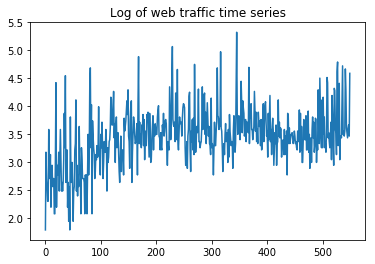

In [81]:
plt.plot(time_series_log)
plt.title("Log of web traffic time series")
plt.show()

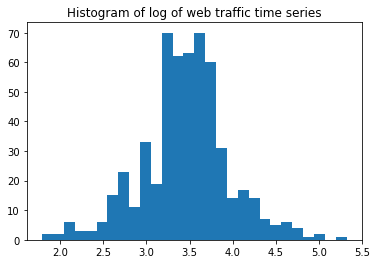

In [82]:
plt.hist(time_series_log, bins='auto')
plt.title("Histogram of log of web traffic time series")
plt.show()